In [1]:
import pandas as pd
#import pandas.plotting._core.PlotAccessor
import pandas.plotting as  pl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import seaborn as sns
#import sklearn.preprocessing.LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:

df=pd.read_csv("Loan.csv")
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
#Number of rows and columns
df.shape

(614, 13)

In [5]:
#statistical measeures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#number of missing value in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# wereplace the nan value with mean
df = df.replace(np.nan,df.mean())

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df= df.dropna()

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# label encoding 
# we are using label encoding for string value into int.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,345,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,282,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,127,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,85,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,350,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,549,0,0,0,0,0,116,0.0,71.000000,360.0,1.0,0,1
610,550,1,1,3,0,0,252,0.0,40.000000,180.0,1.0,0,1
611,551,1,1,1,0,0,398,240.0,253.000000,360.0,1.0,2,1
612,552,1,1,2,0,0,389,0.0,187.000000,360.0,1.0,2,1


In [13]:
df['Dependents'].value_counts()

0    319
1     95
2     94
3     46
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

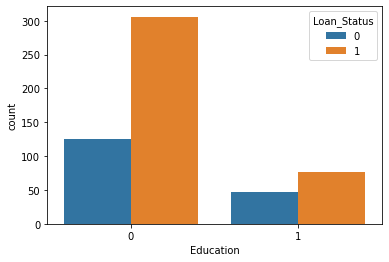

In [14]:

#Data vicualization
sns.countplot(x="Education", hue="Loan_Status",data=df)


<AxesSubplot:xlabel='Gender', ylabel='count'>

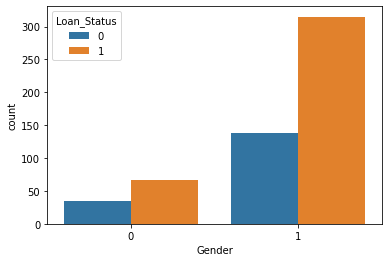

In [15]:
sns.countplot(x="Gender", hue="Loan_Status",data=df)


<AxesSubplot:xlabel='Married', ylabel='count'>

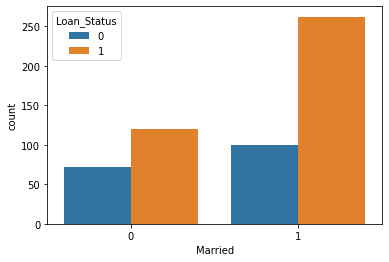

In [16]:
sns.countplot(x="Married", hue="Loan_Status",data=df)


<AxesSubplot:xlabel='Dependents', ylabel='count'>

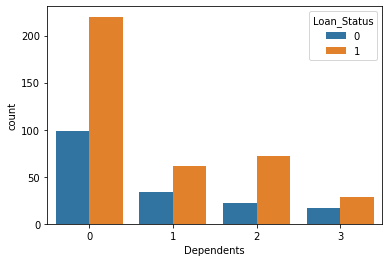

In [17]:
sns.countplot(x="Dependents", hue="Loan_Status",data=df)


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

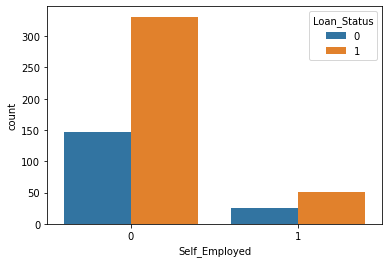

In [18]:
sns.countplot(x="Self_Employed", hue="Loan_Status",data=df)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

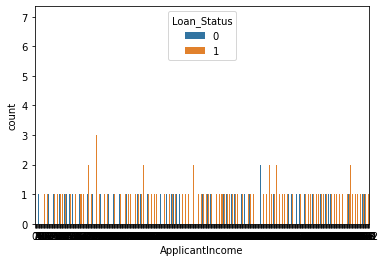

In [19]:
sns.countplot(x="ApplicantIncome", hue="Loan_Status",data=df)


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

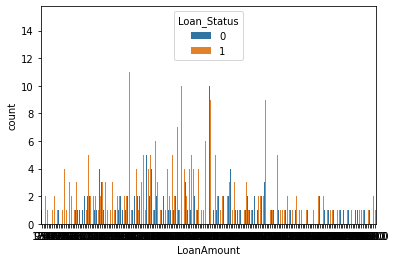

In [20]:
sns.countplot(x="LoanAmount", hue="Loan_Status",data=df)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

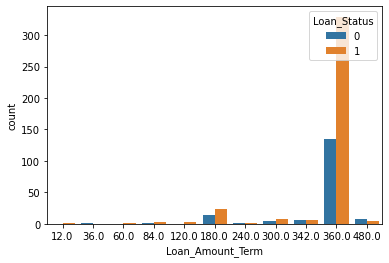

In [21]:
sns.countplot(x="Loan_Amount_Term", hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

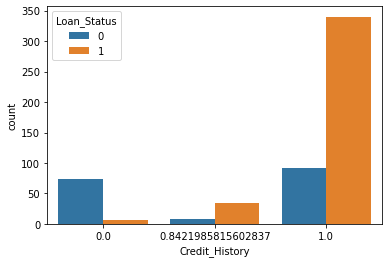

In [22]:
sns.countplot(x="Credit_History", hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

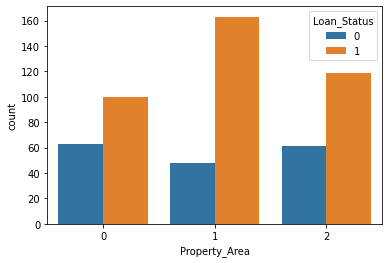

In [23]:
sns.countplot(x="Property_Area", hue="Loan_Status",data=df)

In [24]:
#Droping unused data from the daataset.

df.drop("Loan_ID",axis=1,inplace=True)


In [25]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,345,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,282,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,127,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,85,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,350,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,116,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,252,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,398,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,389,0.0,187.000000,360.0,1.0,2,1


# Multivert

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

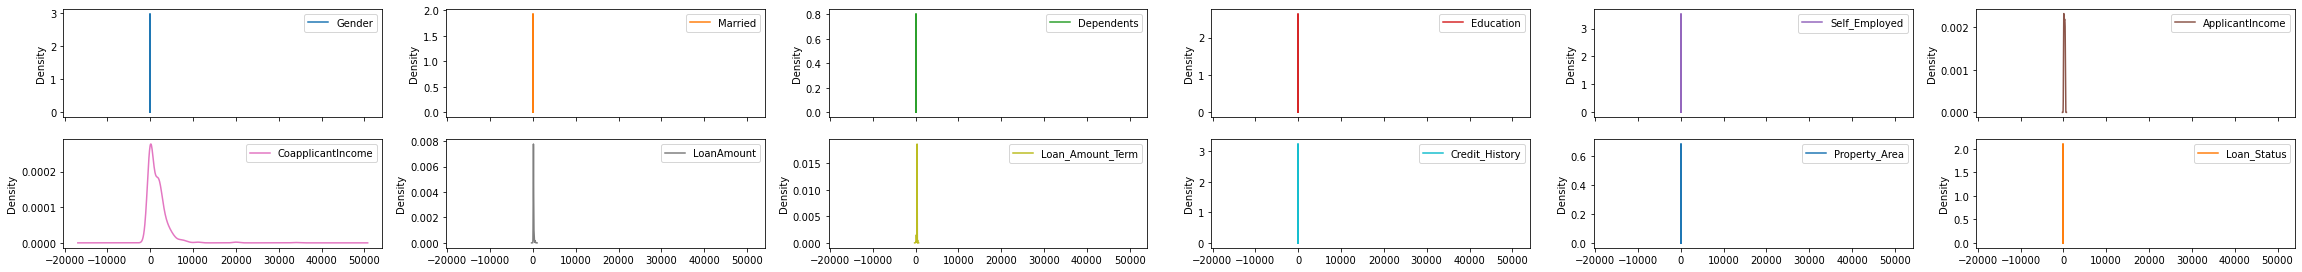

In [26]:
df.plot(kind="kde",subplots=True,layout=(21,6), figsize=(40,50))

In [27]:
df.skew()

Gender              -1.650104
Married             -0.646580
Dependents           0.979788
Education            1.341337
Self_Employed        2.114870
ApplicantIncome      0.042352
CoapplicantIncome    5.736590
LoanAmount           2.578663
Loan_Amount_Term    -2.463236
Credit_History      -1.972706
Property_Area       -0.054158
Loan_Status         -0.821489
dtype: float64

# Plotting Outlier

In [28]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

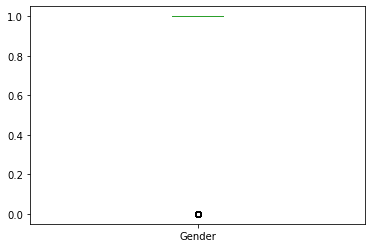

In [29]:
df['Gender'].plot.box() 

<AxesSubplot:>

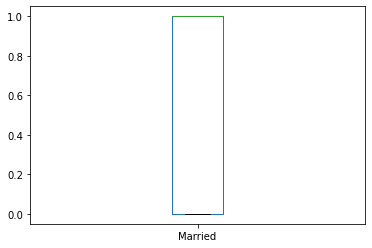

In [30]:
df['Married'].plot.box()

<AxesSubplot:>

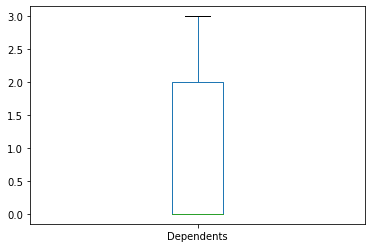

In [31]:
df['Dependents'].plot.box() 

<AxesSubplot:>

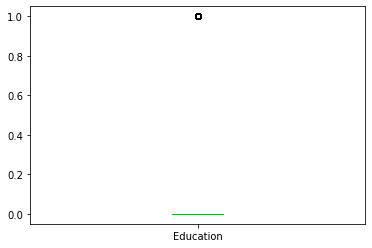

In [32]:
df['Education'].plot.box() 

<AxesSubplot:>

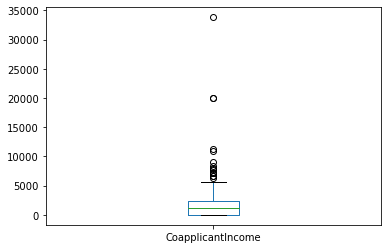

In [33]:
df['CoapplicantIncome'].plot.box() 

<AxesSubplot:>

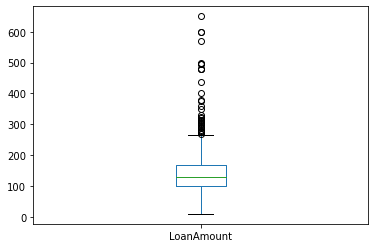

In [34]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

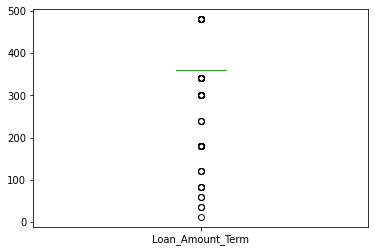

In [35]:
df['Loan_Amount_Term'].plot.box() 

<AxesSubplot:>

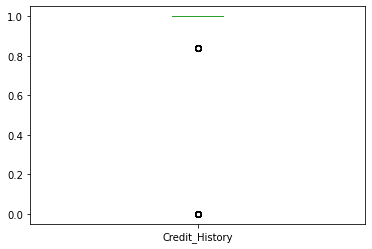

In [36]:
df['Credit_History'].plot.box() 

<AxesSubplot:>

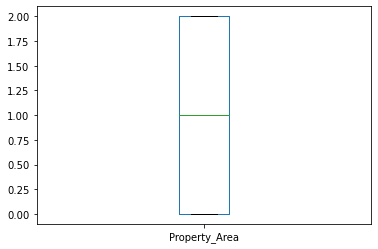

In [37]:
df['Property_Area'].plot.box()

# Remove Outlier

In [38]:
from scipy.stats import zscore 
z=np.abs(zscore(df))
z

array([[0.47218435, 1.37310475, 0.75244704, ..., 0.44886807, 1.23282902,
        0.67101548],
       [0.47218435, 0.72827655, 0.23770892, ..., 0.44886807, 1.31088523,
        1.49027858],
       [0.47218435, 0.72827655, 0.75244704, ..., 0.44886807, 1.23282902,
        0.67101548],
       ...,
       [0.47218435, 0.72827655, 0.23770892, ..., 0.44886807, 1.23282902,
        0.67101548],
       [0.47218435, 0.72827655, 1.22786488, ..., 0.44886807, 1.23282902,
        0.67101548],
       [2.11781692, 1.37310475, 0.75244704, ..., 2.41650718, 0.03902811,
        1.49027858]])

In [39]:
threshold=3
print(np.where(z>3))

(array([  9,  13,  62,  88, 116, 119, 141, 160, 160, 219, 239, 254, 281,
       286, 333, 363, 377, 439, 447, 449, 458, 473, 475, 494, 509, 522,
       526, 530, 544], dtype=int64), array([6, 8, 8, 8, 7, 8, 7, 6, 7, 8, 8, 7, 7, 8, 7, 6, 6, 7, 8, 8, 7, 7,
       7, 8, 7, 8, 6, 8, 7], dtype=int64))


In [40]:
df_new = df[(z<3).all(axis=1)]

In [41]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,345,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,282,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,127,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,85,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,350,0.0,141.000000,360.0,1.0,2,1


In [42]:
x=df.iloc[:,: -1]

In [44]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,345,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,282,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,127,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,85,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,350,0.0,141.000000,360.0,1.0,2


In [45]:
y=df.iloc[:,-1]

In [46]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=30, random_state= 0)

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state = 0)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [49]:
forest.score(x_train,y_train)

0.9809160305343512

In [50]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [51]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.6333333333333333
[[ 1  4]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.12      0.20      0.15         5
           1       0.82      0.72      0.77        25

    accuracy                           0.63        30
   macro avg       0.47      0.46      0.46        30
weighted avg       0.70      0.63      0.66        30



In [52]:
svc = SVC(kernel='rbf') # kernel = 'rbf is -----by defult'
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
presvc = svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.8333333333333334
[[ 0  5]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6666666666666666
[[ 1  4]
 [ 6 19]]
              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.83      0.76      0.79        25

    accuracy                           0.67        30
   macro avg       0.48      0.48      0.48        30
weighted avg       0.71      0.67      0.69        30

